In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() #initializing model
model.add(tf.keras.layers.Flatten()) #flattening the model
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #hidden layer with 128 neurons, activation function set to default
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #second hidden layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #final output layer, softmax is the activation function

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #parameter for training of the model

model.fit(x_train, y_train, epochs=3) #training the models

Epoch 1/3
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4718 - accuracy: 0.8648: 0s -
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1145 - accuracy: 0.9642: 0s - loss: 0.1148 - accura
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0710 - accuracy: 0.9775


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test) #evaluating the efficiency
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0918 - accuracy: 0.9720
0.09175476431846619 0.972000002861023


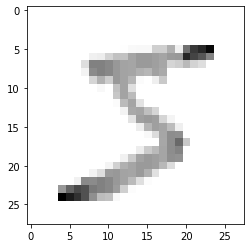

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [4]:
model.save('number_reader.model') #saving a model

INFO:tensorflow:Assets written to: number_reader.model\assets


In [5]:
new_model = tf.keras.models.load_model('number_reader.model') #load the model

In [6]:
predictions = new_model.predict([x_test])

In [7]:
print(predictions)

[[2.4805418e-09 2.2033141e-06 1.5734548e-04 ... 9.9977690e-01
  4.6956515e-07 2.2527286e-06]
 [1.0876145e-08 4.2730251e-05 9.9993014e-01 ... 3.3007458e-10
  1.3742712e-07 2.9329355e-13]
 [7.5328977e-08 9.9936754e-01 4.3904431e-05 ... 7.7458579e-05
  4.0041411e-04 1.6980982e-06]
 ...
 [1.6312305e-09 2.7997768e-07 6.2626498e-08 ... 1.0202833e-05
  3.7912189e-06 4.4579594e-04]
 [3.6422625e-05 1.8367198e-05 7.9728778e-07 ... 1.6702503e-05
  4.6669161e-03 8.3644615e-08]
 [3.7021705e-06 5.9561028e-08 4.6846617e-06 ... 5.1349269e-10
  1.0135041e-06 1.3784461e-09]]


In [8]:
import numpy as np
print(np.argmax(predictions[500]))

3


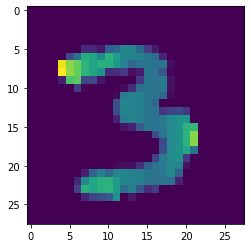

In [9]:
plt.imshow(x_test[500])
plt.show()